### Exercise 4

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import f_oneway
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as stats
from statsmodels.formula.api import ols

# additional imports for exercise 2
from sklearn.decomposition import PCA

# additional imports for exercise 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss

**Exercise 1 - ANOVA F-test and Hierarchical Clustering**


Load the leukemia dataset. It contains gene expression data of 1397 genes from 38
tumor mRNA samples. The expression data is organized in a matrix where rows
correspond to genes and columns to samples. The tumor class of the columns is given
in the file “golub.cl”.

In [2]:
# loading leukemia dataset
leukemia_dataset = pd.read_csv('leukemia.csv')
leukemia_dataset

,gene_name,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
0,AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,...,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
1,AFFX-HUMTFRR/M11507_5_at,-0.56223,0.05358,0.12612,-0.84016,-0.43710,-0.38536,-0.87284,0.07453,-0.36118,...,0.51484,-0.13601,-0.16682,-0.20888,0.25911,-0.21631,0.19129,-0.57687,0.44808,1.19275
2,AFFX-M27830_M_at,2.40116,1.83222,1.62478,1.59089,0.75700,2.32267,1.64407,2.10957,1.64361,...,1.03327,1.16119,2.25875,1.62017,0.91712,1.50523,2.21754,1.23143,1.87913,2.49036
3,AFFX-HUMGAPDH/M33197_3_st,0.10806,0.08245,0.48019,-0.29554,-1.25777,0.40172,0.06140,-0.33715,0.22733,...,-1.08902,-0.48494,-0.25817,-0.44108,-0.20584,0.29198,-0.01033,-0.08370,-0.11911,0.48378
4,AFFX-HSAC07/X00351_M_st,-0.33978,-0.12775,0.32201,0.12330,-1.42668,0.59579,0.02661,0.79449,0.02478,...,-0.66864,0.04777,0.32788,-0.11712,0.51609,-0.24347,0.57144,0.19855,0.21327,0.59067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,L78833_cds4_at,-0.30476,-0.72056,-0.11296,-0.25346,-0.99706,-0.85956,-0.33551,-0.04317,-0.38915,...,-1.08902,-1.02684,-0.22386,-0.23164,-0.01620,-0.22437,-0.63223,-0.33015,-0.70433,-0.97486
1393,M93143_at,-0.21661,-0.65287,0.27332,-0.35475,-0.89248,0.03180,-0.31126,-0.00767,0.02624,...,-1.08902,-0.76021,-0.26109,-0.80229,-0.13063,0.12390,0.15231,-0.18327,-0.56208,-0.89806
1394,U58516_at,0.04695,0.48704,0.72170,0.58403,0.30600,1.10563,0.59002,0.30773,0.46515,...,0.39585,0.35006,0.32939,0.55791,0.11369,0.77377,-0.05275,0.93171,0.01243,0.86634
1395,X83863_at,0.45231,0.42686,0.67579,0.31524,-0.57779,0.51322,0.89885,1.26549,0.24663,...,-0.13281,0.35006,0.32333,0.75559,1.22578,0.59945,0.72956,0.72762,1.10466,1.16990


In [3]:
# loading golub.cl data for tumor class of samples
golub_data = pd.read_csv('golub.cl.csv')
golub_data.rename(columns = { 'Unnamed: 0': 'Sample', 'x': 'Tumor Class' }, inplace=True)
golub_data

,Sample,Tumor Class
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [4]:
# prepare ALL class dataframe
all_sample_dataframe = leukemia_dataset.loc[:][leukemia_dataset.columns[1:28]]

# prepare AML class dataframe
aml_sample_dataframe = leukemia_dataset.loc[:][leukemia_dataset.columns[28:]]

**1. ANOVA F-Test**

**a) What are the assumptions of the ANOVA F-test?**

The ANOVA test is used to test whether a statisitically significant difference exists between samples of two or more independant groups. It uses variance to determine whether the means are equal. The following are the assumptions for ANOVA test:
- Independant samples - Samples are randomly and independantly selected for each group.
- Normal Distribution - All groups(populations of interest) are normally distributed.
- Homoscedasticity - All groups(populations of interest) are assumed to have equal variance. 

**b) For each gene in the dataset, perform the ANOVA F-test (assumptions are
already met) to see whether the gene is significantly differentially
expressed between the two types of Leukemia.**

In [5]:
# performing ANOVA F-test for each gene

# create array to store ANOVA F-test results for each gene
anova_test_result = np.zeros((1397, 3))

for gene_index in np.arange(1397):
    all_sample = all_sample_dataframe.loc[gene_index][:]
    aml_sample = aml_sample_dataframe.loc[gene_index][:]
    
    anova_test_result[gene_index][0] = gene_index # gene_index
    (anova_test_result[gene_index][1], anova_test_result[gene_index][2]) = f_oneway(all_sample, aml_sample) # test result
    
anova_test_result_dataframe = pd.DataFrame(anova_test_result, columns = ['gene_index', 'F-statistic', 'p-value'])
anova_test_result_dataframe['gene_name'] = leukemia_dataset['gene_name']
anova_test_result_dataframe

,gene_index,F-statistic,p-value,gene_name
0,0.0,0.012097,0.913031,AFFX-HUMISGF3A/M97935_3_at
1,1.0,20.086635,0.000072,AFFX-HUMTFRR/M11507_5_at
2,2.0,0.023705,0.878498,AFFX-M27830_M_at
3,3.0,0.119270,0.731837,AFFX-HUMGAPDH/M33197_3_st
4,4.0,3.449932,0.071450,AFFX-HSAC07/X00351_M_st
...,...,...,...,...
1392,1392.0,0.062430,0.804116,L78833_cds4_at
1393,1393.0,0.530909,0.470939,M93143_at
1394,1394.0,0.001766,0.966714,U58516_at
1395,1395.0,3.012626,0.091172,X83863_at


In [8]:
# top 100 most siginificantly differentially expressed genes for the two groups
anova_test_result_dataframe = anova_test_result_dataframe.sort_values(by= 'p-value', ascending=True)
top_100_genes = anova_test_result_dataframe.head(100)
top_100_genes

,gene_index,F-statistic,p-value,gene_name
428,428.0,50.530583,2.366804e-08,M63138_at
684,684.0,50.235874,2.519519e-08,U50136_rna1_at
1348,1348.0,49.887317,2.713676e-08,M31523_at
346,346.0,47.255323,4.802350e-08,M16038_at
481,481.0,46.217096,6.046048e-08,M92287_at
...,...,...,...,...
376,376.0,16.754857,2.294286e-04,M28209_at
464,464.0,16.735696,2.310119e-04,M83221_at
614,614.0,16.672289,2.363345e-04,U30521_at
1175,1175.0,16.579380,2.443697e-04,HG627-HT5097_s_at


**c) Due to our analysis, we now know which genes are significantly
differentially expressed between groups. These will be the best features to
use in order to get good cluster separation. Subset only the rows which
represent the top 100 most significant genes.**

In [15]:
# subset of rows representing top 100 most significant genes
diff_genes_data = leukemia_dataset.loc[np.array(anova_test_result_dataframe[:100]['gene_index'], dtype = int)]
diff_genes_data

,gene_name,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
428,M63138_at,0.98318,1.39165,1.46391,0.86954,0.92723,1.49335,1.71610,1.34453,1.38809,...,1.93217,2.39638,2.16979,2.40208,1.38017,2.33999,2.33015,2.60321,2.31917,1.50779
684,U50136_rna1_at,0.77407,0.69785,0.85670,0.69715,0.63730,0.76063,0.83617,1.19658,0.45291,...,1.92742,1.70779,1.76434,1.44715,0.77720,1.56749,1.74375,1.65866,1.43275,1.51216
1348,M31523_at,0.92234,0.54933,0.10862,1.21964,0.96513,0.69793,0.72464,1.32339,0.79254,...,-0.13281,-0.54233,-0.06494,0.25829,-0.87699,-0.33927,0.08948,-1.20703,-0.79439,-0.40721
346,M16038_at,-0.26342,0.22701,-1.39460,0.62578,0.35737,-0.19119,-0.27313,-0.55534,-0.62212,...,1.30495,1.41996,0.82319,1.49690,1.50992,1.23706,0.70736,1.34766,1.38402,0.54227
481,M92287_at,2.10892,1.52405,1.96403,2.33597,1.85111,1.99391,2.06597,1.81649,2.17622,...,1.45014,0.42904,0.82667,0.63637,1.02250,0.12758,-0.74333,0.73784,0.49470,1.12058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,M28209_at,-0.02628,0.13750,-0.08499,-0.21319,0.09534,-0.79257,-0.36358,-0.63737,-0.45311,...,0.07314,0.47650,0.11909,0.14323,0.13773,0.03889,-0.68619,0.35327,0.50969,0.61446
464,M83221_at,0.40457,0.80750,0.04448,1.12357,0.60582,0.72467,0.85525,0.29899,-0.16359,...,0.56672,1.20923,1.05365,0.35665,1.25603,1.03476,0.80768,1.57100,1.40734,1.27568
614,U30521_at,1.38975,0.42912,1.37787,1.54925,1.66831,1.40793,1.21015,1.22509,1.50622,...,0.16246,0.12923,1.17137,0.36497,-0.27966,0.80760,1.16705,-0.54061,-0.79893,-0.28701
1175,HG627-HT5097_s_at,1.17928,0.97420,1.01353,1.37158,0.25916,1.36983,1.37934,1.58273,1.10822,...,2.28218,1.24711,1.20664,0.89804,1.42455,1.42560,1.78468,1.12023,2.39362,2.42472


**2. Plot 2 dendrograms using the 100 selected genes**

**a) One for a single linkage approach and another one for ward approach.**

In [16]:
# dropping gene_name column from dataframe
diff_genes_data = diff_genes_data.drop(columns=['gene_name'])

# transpose dataframe to obtain sample x gene dataframe
diff_genes_data = diff_genes_data.T

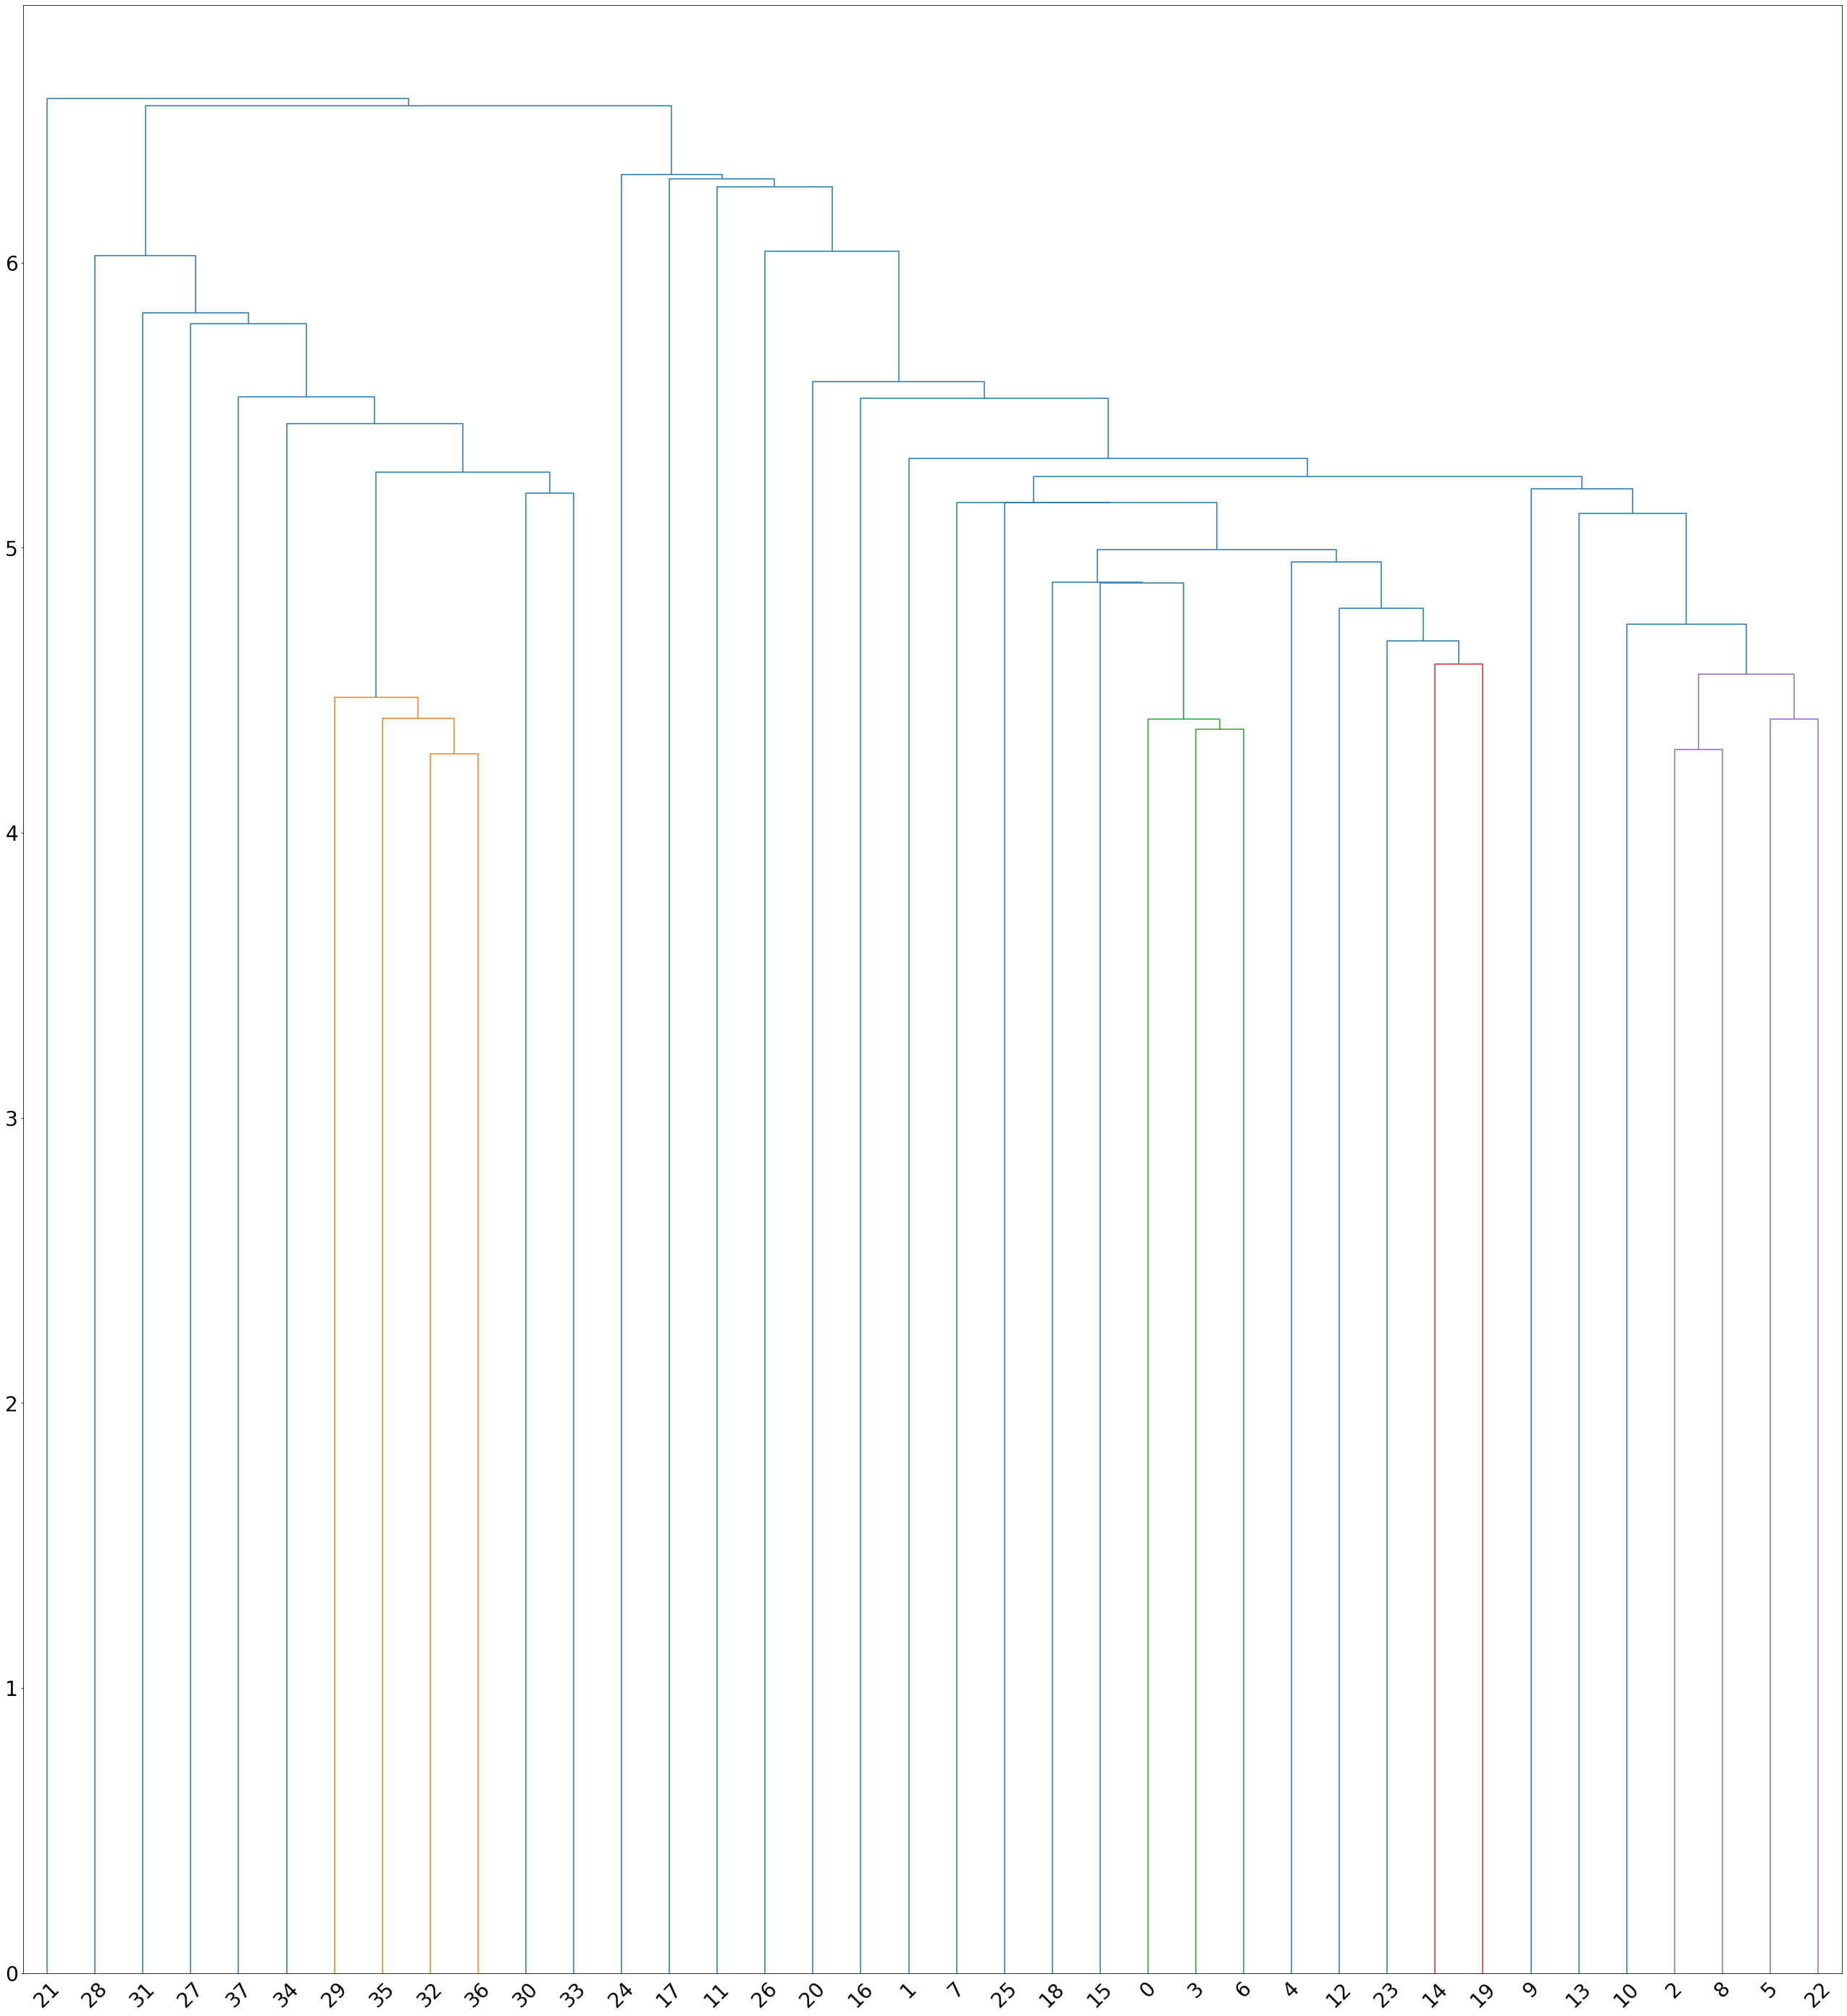

In [17]:
# single linkage clustering
single_linkage_matrix = linkage(diff_genes_data, 'single')
fig = plt.figure(figsize = (45,50))
dendrogram_figure = dendrogram(single_linkage_matrix)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

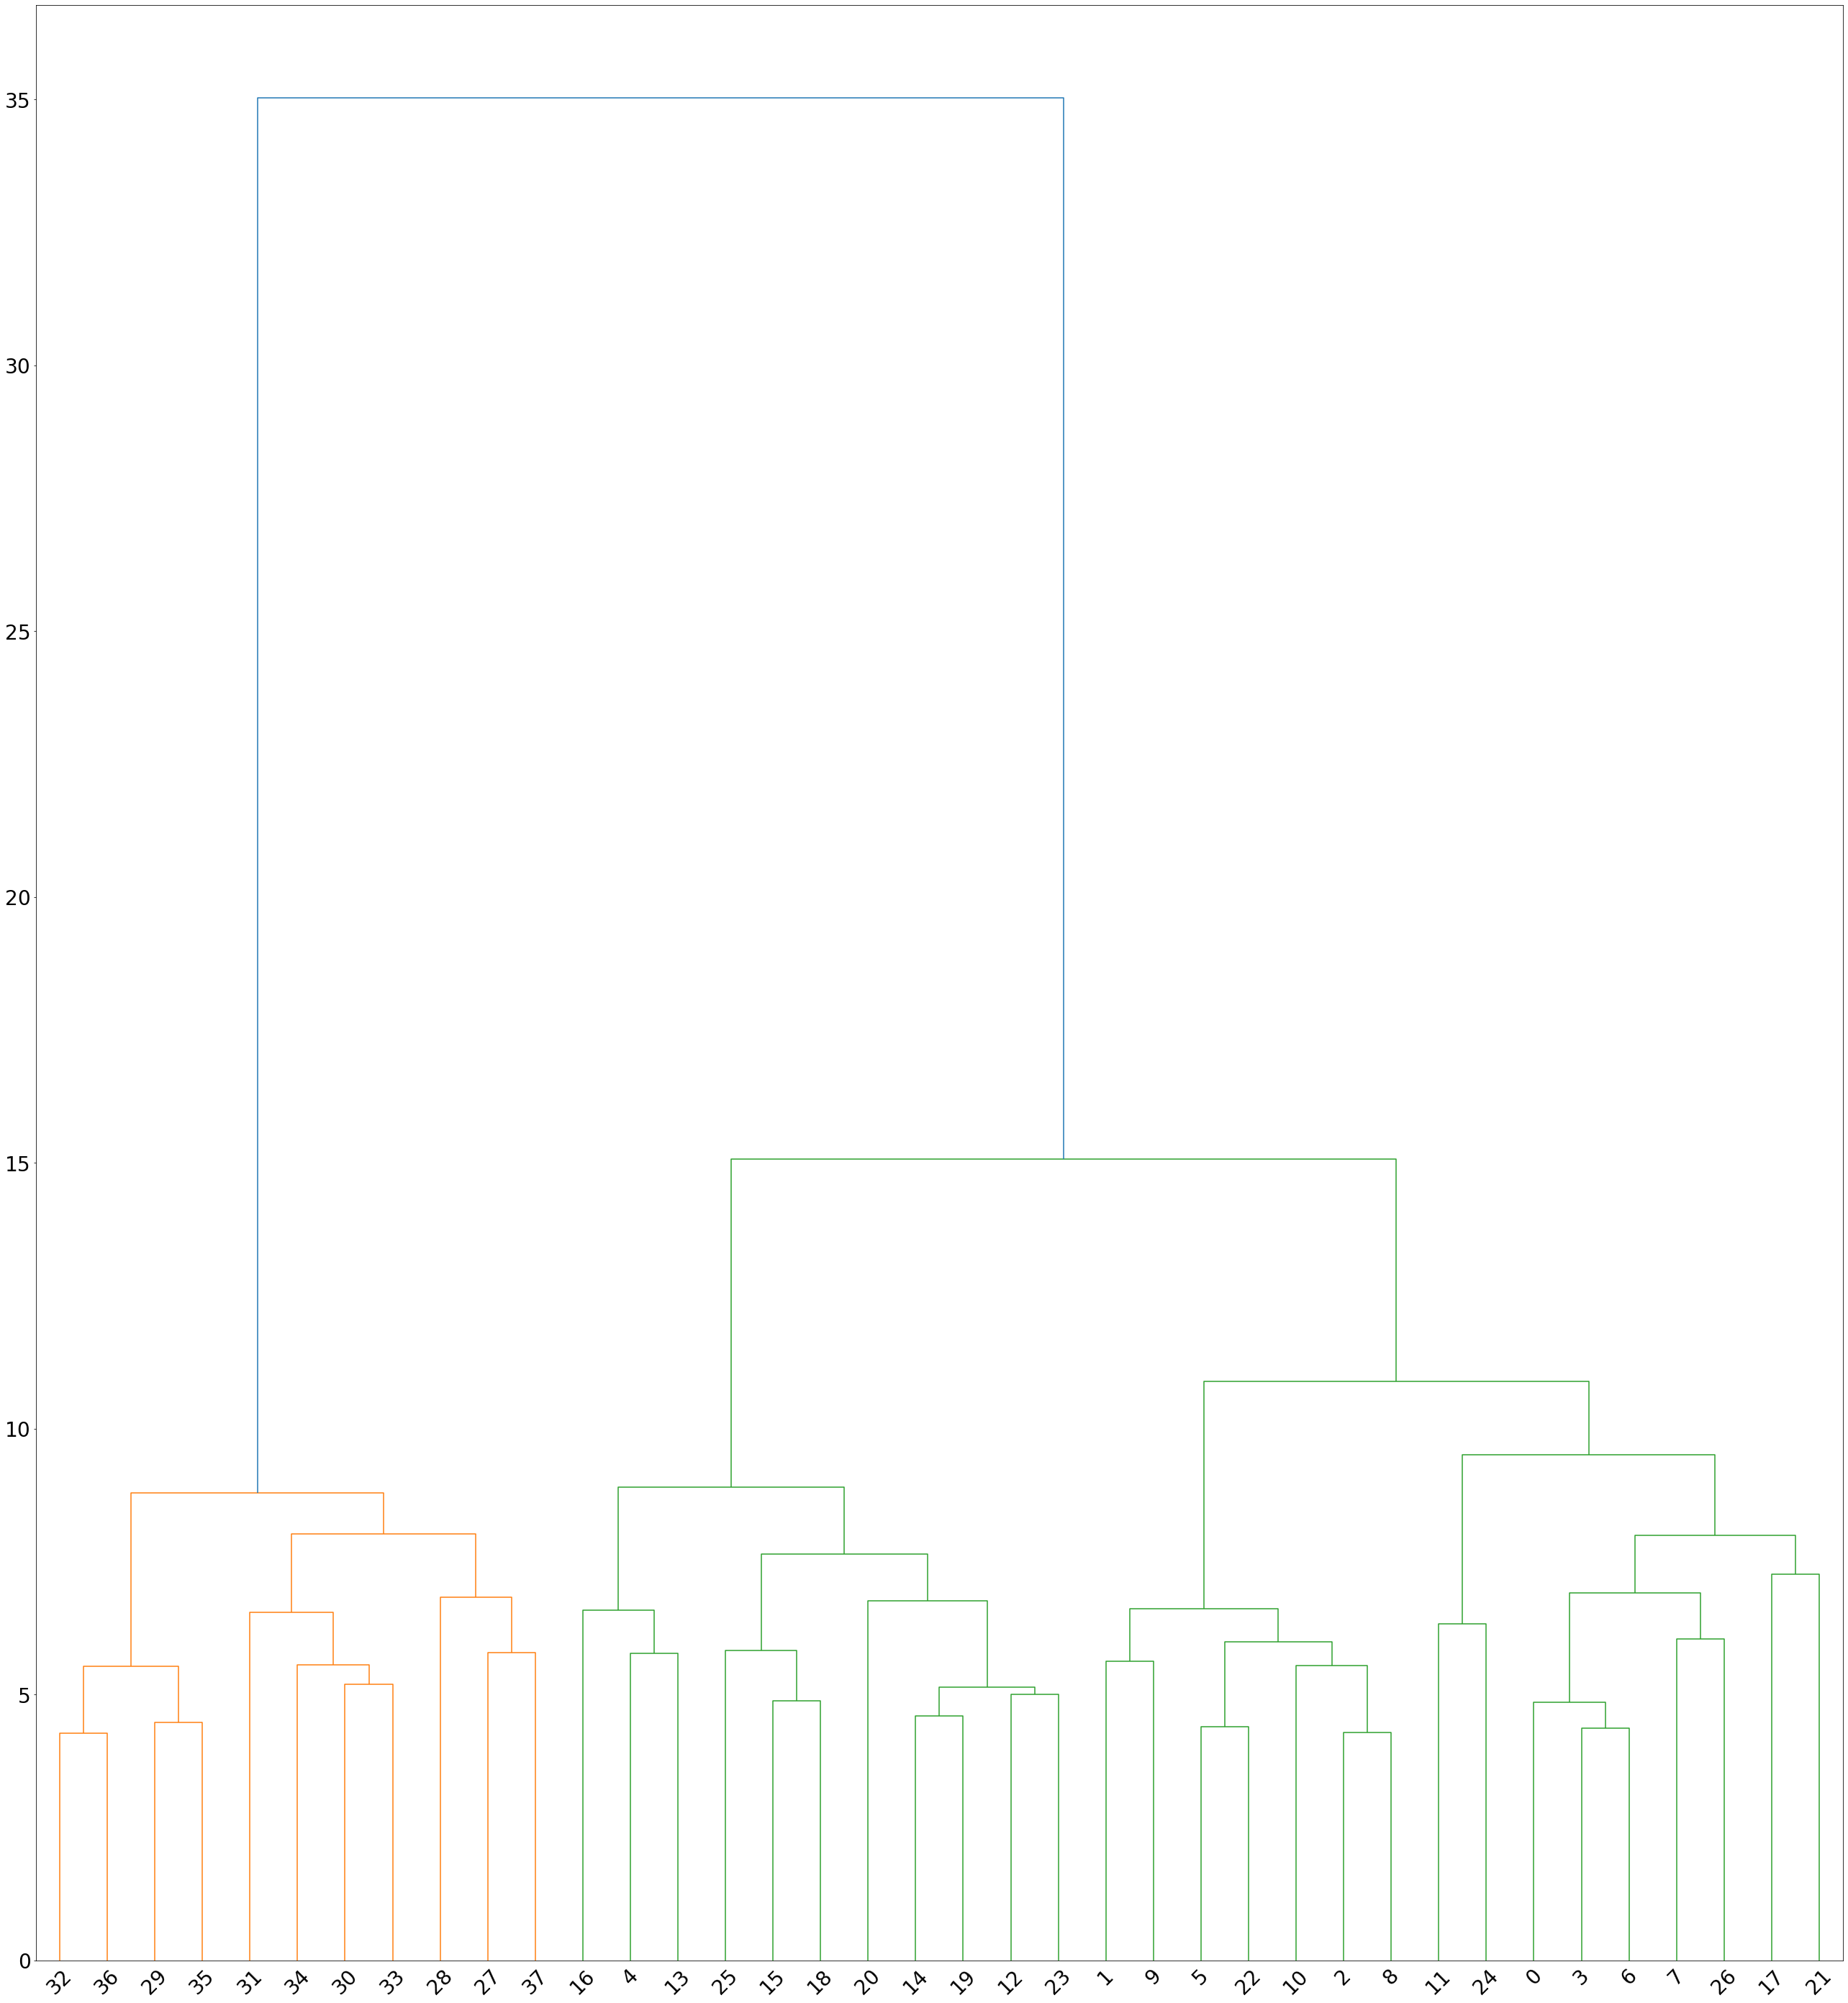

In [18]:
# Ward clustering
ward_linkage_matrix = linkage(diff_genes_data, 'ward')
fig = plt.figure(figsize = (45,50))
dendrogram_figure = dendrogram(ward_linkage_matrix)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

**b) Which method would you recommend based on the dendrograms for a
clustering? Why?**

The Single linkage method and Ward criterion method vary on the basis of the metric used to define the proximity between two clusters. We are already aware that our data consists of samples for two types of leukemia classes. The features that we have selected significantly differentiate between the two leukemia classes. I would prefer to obtain clusters which are more well separated from each other and each cluster must contain data points which are similar to other data points within their cluster. Based on the dendrograms, I will prefer the Ward method for clustering since the final clusters are more well separated in this dendrogram.

- In the Ward method dendrogram, the first few clusters are created from data points that are significantly different (having a dissimilarity of atleast 4 units).These clusters are then merged with other similar clusters and at all levels there is sufficient dissmilarity that exists between the merged clusters. The final cluster in created by merging two clusters that differ by almost 4 units. Hence Ward method dendrogram ensures sufficient dissimilarity between the clusters.

- The dendrogram of Single linkage method shows that the clusters created, even at the later stages, are very similar to each other hence well separated clusters are not created by this method for the given data. Hence I would not recommend Single Linkage method for the given problem.

**c) Familiarize yourself with Cophenetic correlation coefficient and calculate
the cophenetic correlation distance for both single linkage as well as ward.**

In [19]:
# cophenetic correlation distance for single linkage clustering
cophenetic_corr_dist_single, cophenetic_dist_matrix = cophenet(single_linkage_matrix, pdist(diff_genes_data))
print(f'Cophenetic Correlation Distance for Single Linkage Method is {cophenetic_corr_dist_single}')

Cophenetic Correlation Distance for Single Linkage Method is 0.77230456196625


In [20]:
# cophenetic correlation distance for ward linkage clustering
cophenetic_corr_dist_ward, cophenetic_dist_matrix = cophenet(ward_linkage_matrix, pdist(diff_genes_data))
print(f'Cophenetic Correlation Distance for Ward Linkage Method is {cophenetic_corr_dist_ward}')

Cophenetic Correlation Distance for Ward Linkage Method is 0.8520406295745668


**d) Based on the cophenetic correlation distance, which clustering method
performed better?**

The Single Linkage Method performed better based on cophenetic correlation distance. **Why?**

**3. Apply two Agglomerative Clustering.**

**a) One using single linkage and one using ward method**

In [23]:
# Single Linkage Agglomerative Clustering
single_linkage_model = AgglomerativeClustering(linkage = 'single')
single_agg_result = single_linkage_model.fit_predict(diff_genes_data)
single_agg_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
# Ward Linkage Agglomerative Clustering
ward_linkage_model = AgglomerativeClustering(linkage = 'ward')
ward_agg_result = ward_linkage_model.fit_predict(diff_genes_data)
ward_agg_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

**Exercise 2 - PCA**

Using the same leukemia dataset generate the feature matrix (transposed leukemia
dataset) and the class labels (golub.cl.csv).

In [25]:
# preparing the feature matrix (i.e observations x features matrix)
leukemia_dataset_with_genename_as_index = leukemia_dataset.set_index('gene_name')
leukemia_dataset_with_genename_as_index.dtypes
gene_data_feature_matrix = leukemia_dataset_with_genename_as_index.T
gene_data_feature_matrix

gene_name,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-M27830_M_at,AFFX-HUMGAPDH/M33197_3_st,AFFX-HSAC07/X00351_M_st,A28102_at,AB000449_at,AB000468_at,AB001106_at,AB001325_at,...,X67491_f_at,L41268_f_at,S80905_f_at,X03068_f_at,D64015_at,L78833_cds4_at,M93143_at,U58516_at,X83863_at,Z17240_at
V1,0.45695,-0.56223,2.40116,0.10806,-0.33978,-1.07755,-1.45769,-0.23113,-0.28904,0.79436,...,-0.95744,-0.18822,0.33856,1.60338,-0.69342,-0.30476,-0.21661,0.04695,0.45231,-0.35920
V2,-0.09654,0.05358,1.83222,0.08245,-0.12775,-0.53800,-0.92959,-0.58643,-0.10064,0.59074,...,-1.01189,-0.91917,-1.39420,1.04229,-0.80743,-0.72056,-0.65287,0.48704,0.42686,-0.43633
V3,0.90325,0.12612,1.62478,0.48019,0.32201,-1.46227,-0.33853,-0.33121,0.11741,1.13748,...,-0.94549,-0.32879,0.37034,0.63790,-0.51414,-0.11296,0.27332,0.72170,0.67579,0.34031
V4,-0.07194,-0.84016,1.59089,-0.29554,0.12330,0.07237,-0.46145,-0.48925,-0.52887,0.82368,...,-0.30130,0.01439,-0.18727,1.25547,-1.17554,-0.25346,-0.35475,0.58403,0.31524,-0.90930
V5,0.03232,-0.43710,0.75700,-1.25777,-1.42668,-1.27334,-0.37552,0.15938,0.18413,0.06622,...,-0.47611,-1.24245,-0.87189,1.08401,-1.42668,-0.99706,-0.89248,0.30600,-0.57779,-0.36663
V6,0.09713,-0.38536,2.32267,0.40172,0.59579,-0.29517,-0.43597,-1.12872,-0.93176,1.21522,...,-0.19119,-0.30207,0.29157,0.75732,-0.73560,-0.85956,0.03180,1.10563,0.51322,-0.07845
V7,-0.11978,-0.87284,1.64407,0.06140,0.02661,0.04723,-1.12168,-0.31126,-0.40567,1.06158,...,-0.12958,0.03492,0.60809,0.76993,-0.29641,-0.33551,-0.31126,0.59002,0.89885,0.09493
V8,0.23381,0.07453,2.10957,-0.33715,0.79449,0.60545,-1.36832,-0.57804,-0.38235,1.24551,...,-0.67066,-0.38855,0.97708,1.84724,-0.45633,-0.04317,-0.00767,0.30773,1.26549,-0.00563
V9,0.23987,-0.36118,1.64361,0.22733,0.02478,-1.47649,-0.50580,0.38892,-0.19696,1.02702,...,0.23987,-0.22190,-0.42299,0.56187,-0.73527,-0.38915,0.02624,0.46515,0.24663,-0.32967
V10,0.44201,-1.21583,0.32217,-0.57804,-0.65476,-0.60606,-0.55981,-0.45344,0.05976,0.68831,...,-0.43751,-0.48201,0.09585,0.47628,-1.21583,-0.36538,-0.35089,0.88991,0.38565,-0.03974


In [26]:
# class labels
y = golub_data['Tumor Class']
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
Name: Tumor Class, dtype: int64

**1. Perform a PCA on the feature matrix and answer the following**

In [27]:
# create PCA model and fit model to feature_matix
pca = PCA()
gene_pca_result = pca.fit_transform(gene_data_feature_matrix)
gene_pca_result

array([[-1.66097653e+00, -5.55344514e+00, -4.08752470e+00, ...,
         1.20513583e+00, -3.42846960e-01,  4.84658885e-15],
       [-1.28644441e+00,  4.63851571e+00,  3.39181451e+00, ...,
         5.72539341e-01,  4.30725929e-03,  4.84658885e-15],
       [-1.55187216e+00, -9.50775135e+00,  7.04167677e+00, ...,
        -2.32465774e+00,  1.45084711e+00,  4.84658885e-15],
       ...,
       [ 1.07419931e+01,  7.37587603e+00,  6.36773890e-01, ...,
         8.76250582e-01, -9.43719417e-02,  4.84658885e-15],
       [ 1.27538160e+01,  9.09981623e+00,  1.31807025e+00, ...,
        -2.17416840e-01, -2.62355679e+00,  4.84658885e-15],
       [ 9.96351945e+00,  3.02486006e+00, -2.81442388e-01, ...,
         1.18180814e+00,  5.45101470e-01,  4.84658885e-15]])

**a. How many PC’s do you need to explain at least 95% of the variance**

In [28]:
# using pca.explained_variance_ to obtain the percentage of variance explained by each PCA
sum = 0
component_index = 0

while sum < 0.95:
    print(f'Principal Component {component_index + 1} explains {pca.explained_variance_ratio_[component_index]*100}% variance')
    sum += pca.explained_variance_ratio_[component_index]
    
    component_index = component_index + 1
print( f'95% of the variance in data can be explained by {component_index} PC\'s')

Principal Component 1 explains 17.558612682725602% variance
Principal Component 2 explains 10.206709882300304% variance
Principal Component 3 explains 7.512126490725329% variance
Principal Component 4 explains 5.534308037752829% variance
Principal Component 5 explains 4.726488434234054% variance
Principal Component 6 explains 4.0404955387139685% variance
Principal Component 7 explains 3.7515050854466923% variance
Principal Component 8 explains 3.526663588068171% variance
Principal Component 9 explains 3.2900888928230523% variance
Principal Component 10 explains 2.741355536844279% variance
Principal Component 11 explains 2.519254747581477% variance
Principal Component 12 explains 2.2297970627403796% variance
Principal Component 13 explains 2.108825244326843% variance
Principal Component 14 explains 2.0291555518988753% variance
Principal Component 15 explains 1.8734306315463845% variance
Principal Component 16 explains 1.8445750530299736% variance
Principal Component 17 explains 1.778797

**b. Make a scatterplot of the projections on the first two PC‘s with the
colouring corresponding to the class labels**

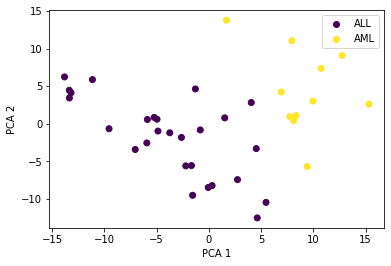

In [29]:
classes = ['ALL', 'AML']
scatter = plt.scatter(gene_pca_result[:,0], gene_pca_result[:,1], c= y)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

**c. Based on the scatterplot answer the following questions**

**i. Given the plot, do you think PCA might be a good choice? Why?**

PCA appears to be a good choice due to following reasons:
- The large number of features of the dataset are reduced to just two Principal Components which are able to differentiate between the two classes. The dataset contained numerous features as compared to datapoints hence it is is reasonable to apply a dimensionality reduction technique such as PCA.
- All irrelevant information has been supressed and reduced to principal components which are not linearly correlated.
- The first two PCA's are able to separate the data points of the two classes properly in the plot.
- We are also able to plot the data points and view a visual representation because we have reduced the dimensions of the data.

**ii. Do you think n=2 components are a good choice? Why?**

The two PCA's are able to separate the datapoints into the two classes properly without any overlap (as shown by scatter plot). But the two components are only able to explain around 27% of variance as indicated by the explained variance ratio. Since these two components are able to separate the two classes well they are a good choice for dimensionality reduction in the problem. 

**2. Inform yourself regarding decorrelation of features in a dataset**

**a. Identify the correlated features in the dataset**

In [30]:
# calculating pairwise feature correlation in matrix
correlated_features = set()
corr_matrix = gene_data_feature_matrix.corr().abs()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if(corr_matrix.iloc[i,j]>0.8):
            correlated_features.add(corr_matrix.columns[i])
print(correlated_features)

{'L36531_at', 'L40391_at', 'HG1751-HT1768_at', 'M54915_s_at', 'M31523_at', 'L11672_r_at', 'D38073_at', 'U72206_at', 'Z35102_at', 'U65928_at', 'Z47055_s_at', 'M90356_f_at', 'Z15115_at', 'L43631_at', 'U20998_at', 'D14658_at', 'X89101_s_at', 'X13444_at', 'L37112_at', 'U68063_at', 'X74801_at', 'D14657_at', 'X82895_at', 'X79981_at', 'X51345_at', 'Z32765_at', 'U72936_s_at', 'X68277_at', 'X83492_at', 'Z29064_at', 'M37583_at', 'X68985_s_at', 'HG627-HT5097_s_at', 'U25750_at', 'U39905_at', 'U19948_at', 'X14008_rna1_f_at', 'X97302_at', 'U04241_at', 'X54941_at', 'L47276_s_at', 'J00212_f_at', 'L42572_at', 'U79254_at', 'U38980_at', 'Y14140_at', 'X90846_at', 'M21259_at', 'M19961_at', 'U13695_at', 'U59736_at', 'U41767_s_at', 'X62654_rna1_at', 'Z71460_at', 'Z80783_at', 'U03398_at', 'U90907_at', 'L27706_at', 'U82311_at', 'L00389_f_at', 'HG3076-HT3238_s_at', 'L05187_at', 'L25931_s_at', 'M97935_s_at', 'L20298_at', 'X85373_at', 'S82297_at', 'HG4535-HT4940_s_at', 'S40719_s_at', 'U52112_rna5_at', 'Z22551_at'

**b. Decorrelate the correlated datasets**

In [31]:
# METHOD 1 - dropping correlated features of dataset
decorrelated_dataset = gene_data_feature_matrix.drop(labels=correlated_features, axis=1)
decorrelated_dataset

# METHOD 2 - also possible to prerform PCA

gene_name,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-M27830_M_at,AFFX-HUMGAPDH/M33197_3_st,AFFX-HSAC07/X00351_M_st,A28102_at,AB000449_at,AB000468_at,AB001106_at,AB001325_at,...,X13930_f_at,X67491_f_at,L41268_f_at,S80905_f_at,D64015_at,L78833_cds4_at,M93143_at,U58516_at,X83863_at,Z17240_at
V1,0.45695,-0.56223,2.40116,0.10806,-0.33978,-1.07755,-1.45769,-0.23113,-0.28904,0.79436,...,0.03423,-0.95744,-0.18822,0.33856,-0.69342,-0.30476,-0.21661,0.04695,0.45231,-0.35920
V2,-0.09654,0.05358,1.83222,0.08245,-0.12775,-0.53800,-0.92959,-0.58643,-0.10064,0.59074,...,-0.08234,-1.01189,-0.91917,-1.39420,-0.80743,-0.72056,-0.65287,0.48704,0.42686,-0.43633
V3,0.90325,0.12612,1.62478,0.48019,0.32201,-1.46227,-0.33853,-0.33121,0.11741,1.13748,...,0.23207,-0.94549,-0.32879,0.37034,-0.51414,-0.11296,0.27332,0.72170,0.67579,0.34031
V4,-0.07194,-0.84016,1.59089,-0.29554,0.12330,0.07237,-0.46145,-0.48925,-0.52887,0.82368,...,-0.16453,-0.30130,0.01439,-0.18727,-1.17554,-0.25346,-0.35475,0.58403,0.31524,-0.90930
V5,0.03232,-0.43710,0.75700,-1.25777,-1.42668,-1.27334,-0.37552,0.15938,0.18413,0.06622,...,-0.41198,-0.47611,-1.24245,-0.87189,-1.42668,-0.99706,-0.89248,0.30600,-0.57779,-0.36663
V6,0.09713,-0.38536,2.32267,0.40172,0.59579,-0.29517,-0.43597,-1.12872,-0.93176,1.21522,...,-0.30902,-0.19119,-0.30207,0.29157,-0.73560,-0.85956,0.03180,1.10563,0.51322,-0.07845
V7,-0.11978,-0.87284,1.64407,0.06140,0.02661,0.04723,-1.12168,-0.31126,-0.40567,1.06158,...,0.22157,-0.12958,0.03492,0.60809,-0.29641,-0.33551,-0.31126,0.59002,0.89885,0.09493
V8,0.23381,0.07453,2.10957,-0.33715,0.79449,0.60545,-1.36832,-0.57804,-0.38235,1.24551,...,0.44470,-0.67066,-0.38855,0.97708,-0.45633,-0.04317,-0.00767,0.30773,1.26549,-0.00563
V9,0.23987,-0.36118,1.64361,0.22733,0.02478,-1.47649,-0.50580,0.38892,-0.19696,1.02702,...,0.04208,0.23987,-0.22190,-0.42299,-0.73527,-0.38915,0.02624,0.46515,0.24663,-0.32967
V10,0.44201,-1.21583,0.32217,-0.57804,-0.65476,-0.60606,-0.55981,-0.45344,0.05976,0.68831,...,0.37101,-0.43751,-0.48201,0.09585,-1.21583,-0.36538,-0.35089,0.88991,0.38565,-0.03974


**c. What is the purpose of carrying out decorrelation of features in a dataset?**

- Correlated features convey redundant information to models prepared for the dataset hence they must be decorrelated.
- Removal of correlated features also helps reduce the dimensions of the dataset
- Linear models such as linear regression and logistic regression do not perform well when correlation is present in features.

**Exercise 3 - Logistic Regression**

**1. Using the reduced dataset from exercise 2.1, carry out the following tasks:**


**a. Generate a logistic regression model on the first 5 PCs of the reduced
dataset using 80% of the total samples**

In [32]:
# preparing dataset with first 5 PCAs
column_names = ['pca_%i' % i for i in range(5)]
gene_pca_dataframe = pd.DataFrame(gene_pca_result[:, 0:5], columns = column_names, index= gene_data_feature_matrix.index)

# preparing class label
y = golub_data['Tumor Class']

# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(gene_pca_dataframe, y, test_size = 0.2)

In [33]:
# generating logistic regression model
logistic_regression_model = LogisticRegression().fit(X_train, y_train)

**b. Predict the labels for the remaining 20% of the samples and calculate your
model’s accuracy**

In [34]:
# predicting labels for test data
y_predicted = logistic_regression_model.predict(X_test)
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [35]:
# accuracy of model
mean_accuracy = logistic_regression_model.score(X_test, y_test)
print(f'Logistic Regression model has a mean accuracy of {mean_accuracy}')

Logistic Regression model has a mean accuracy of 1.0


**2. Inform yourself about Brier’s Score. How can it be used to evaluate the
performance of your model? Show by implementation.**

Brier's Score calculates mean squared error between predicted probabilities and expected values. It summarises the magnitude of error in the probability forecasts. The score is between 0.0 and 1.0, with 0.0 being the best score.

In [36]:
# prediction probabilities
prediction_probabilities = logistic_regression_model.predict_proba(X_test)
# prediction_probabilities
brier_score_loss_result = brier_score_loss(y_test.to_numpy(), prediction_probabilities)

ValueError: y should be a 1d array, got an array of shape (8, 2) instead.

**3. Assess the significance of your variables using the likelihood ratio test.**